### Introduction

A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.

A few tasks that can be performed using this dataset is as follows:

Perform Data-Cleaning,Preprocessing,Visualizing and Feature Engineering on the Dataset.

Implement DBSCAN or K-Means Clustering models.


---


The Attributes Include:

Sl_No
Customer Serial Identification Number: Serves purpose of indexing values

Customer Key
Customer Key

Avg_Credit_Limit
Average Credit Card Limit For The Customer

Total_Credit_Cards
Total Credit Cards Owned by the Customer

Total_visits_bank
Total Number of Bank Visits by the Customer

Total_visits_online
Total Visits Online by the Bank Customer

Total_calls_made
Total Calls Made by the Customer to the Bank

### Load libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

### Load dataset

In [2]:
data = pd.read_csv("/content/drive/MyDrive/DS Course Uploads/Datasets/Credit Card Customer Data.csv")

In [3]:
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


### Summarize data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


### Perform EDA

In [6]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
data.duplicated().any()

False

In [8]:
df = data.drop(['Sl_No', 'Customer Key'], axis=1)

In [9]:
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


### Standardize data

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

### Modelling

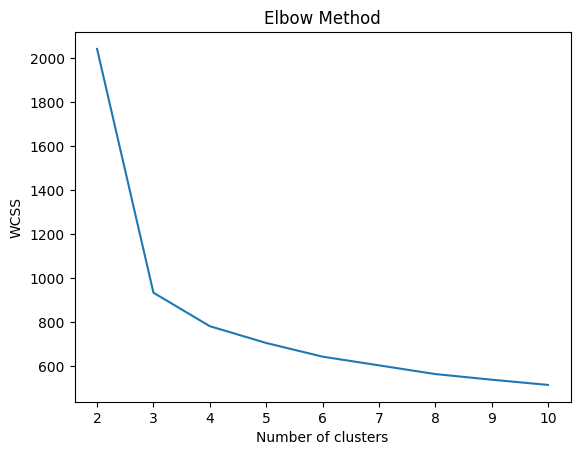

In [15]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=10, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
model_k = KMeans(n_clusters=3,random_state=10, n_init=10)

In [18]:
clusters_new = model_k.fit(scaled_data)
clusters_new.labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
df['Kcluster'] = clusters_new.labels_

In [20]:
df.groupby("Kcluster").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Kcluster,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [53]:
model = DBSCAN()
max_score = silhouette_score(scaled_data, model.fit_predict(scaled_data))
print(max_score)

for i in np.arange(0.05, 1.0, 0.05):
  eps = i
  model2 = DBSCAN(eps=i, min_samples=8, metric="euclidean")
  labels = model2.fit_predict(scaled_data)
  if len(set(labels)) > 1:
    sil_score=silhouette_score(scaled_data, labels)
    max_score = max(max_score, sil_score)
    eps = min(i, eps)

print(max_score, eps, len(set(labels)))

# eps = 0.9, min_samples = 6

-0.1403089162935231
0.35000000000000003 -0.08552804554572153
0.4 -0.35428192212871684
0.45 -0.4402696184149747
0.5 -0.26038256721242764
0.55 -0.16689023902357486
0.6000000000000001 -0.03550952548109576
0.6500000000000001 0.3542616991751844
0.7000000000000001 0.4969839317812278
0.7500000000000001 0.54516922554569
0.8 0.5511465880593915
0.8500000000000001 0.556878551031131
0.9000000000000001 0.556878551031131
0.9500000000000001 0.4992608835048709
0.556878551031131 0.9500000000000001 3


In [96]:
model_dbs = DBSCAN(0.9, min_samples=6)
clusters_dbs = model_dbs.fit(scaled_data)

In [97]:
df["Dcluster"] = clusters_dbs.labels_

In [98]:
df["Dcluster"].value_counts()

Dcluster
 0    607
-1     31
 1     16
 2      6
Name: count, dtype: int64

In [106]:
print(df[df.Dcluster != -1].groupby("Dcluster").mean())
print(df[df.Dcluster != -1].groupby("Dcluster").max())
print(df[df.Dcluster != -1].groupby("Dcluster").min())

          Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Dcluster                                                            
0             25703.459638            4.383855           2.561779   
1            161437.500000            8.625000           0.812500   
2            102666.666667            9.833333           0.833333   

          Total_visits_online  Total_calls_made  Kcluster  
Dcluster                                                   
0                    1.915980          3.790774  0.365733  
1                    9.687500          1.187500  2.000000  
2                    8.833333          1.500000  2.000000  
          Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Dcluster                                                            
0                    75000                   7                  5   
1                   195000                  10                  1   
2                   114000                  10                  1   

        

### Visualization

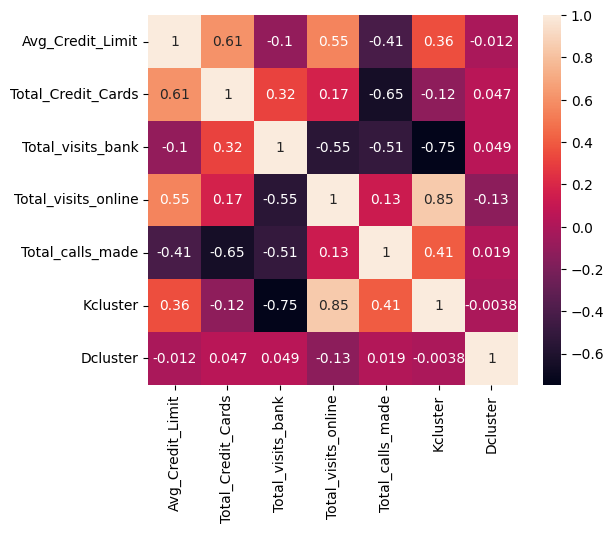

In [104]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, square=True)
plt.show()

<Axes: xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

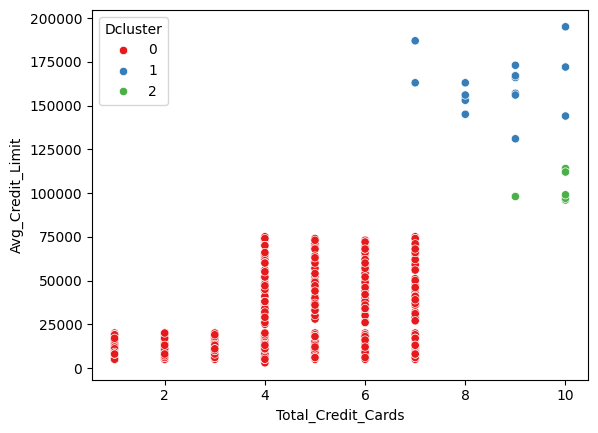

In [109]:
sns.scatterplot(df[df.Dcluster != -1], x="Total_Credit_Cards", y="Avg_Credit_Limit", hue="Dcluster", palette="Set1")

<Axes: xlabel='Total_visits_online', ylabel='Total_visits_bank'>

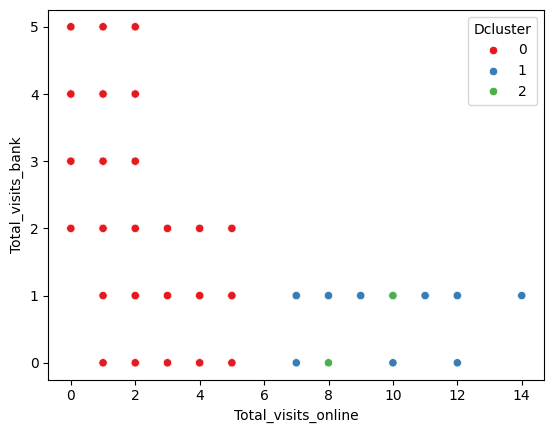

In [111]:
sns.scatterplot(df[df.Dcluster != -1], x="Total_visits_online", y="Total_visits_bank", hue="Dcluster", palette="Set1")

<Axes: xlabel='Avg_Credit_Limit', ylabel='Count'>

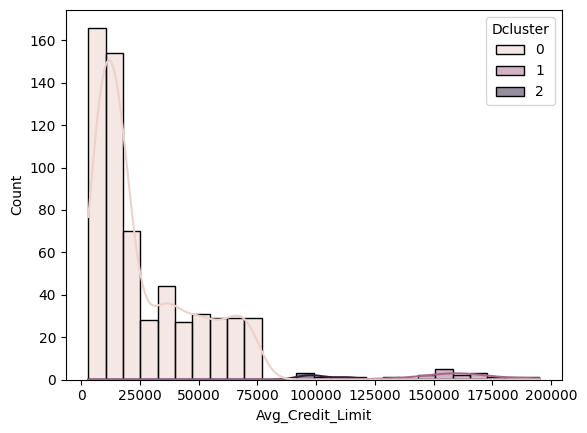

In [114]:
sns.histplot(df[df.Dcluster != -1], x="Avg_Credit_Limit", kde=True, hue="Dcluster")

<Axes: xlabel='Total_Credit_Cards', ylabel='Count'>

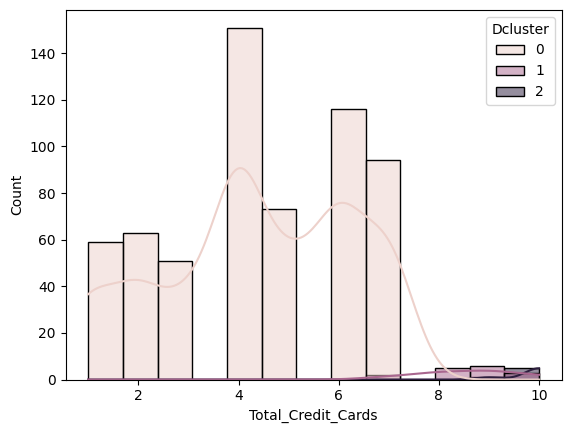

In [118]:
sns.histplot(df[df.Dcluster != -1], x="Total_Credit_Cards", kde=True, hue="Dcluster")



---



<Axes: xlabel='Avg_Credit_Limit', ylabel='Count'>

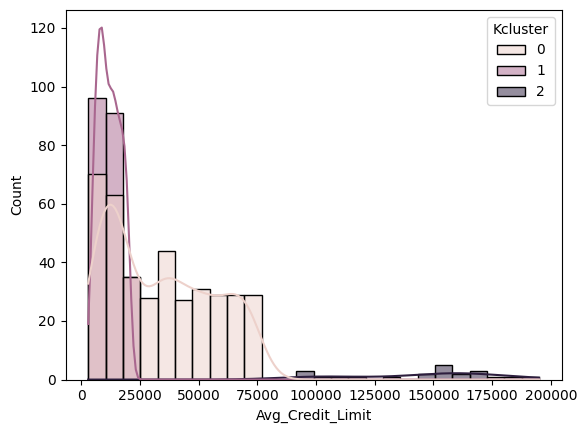

In [115]:
sns.histplot(df[df.Dcluster != -1], x="Avg_Credit_Limit", kde=True, hue="Kcluster")

<Axes: xlabel='Total_Credit_Cards', ylabel='Count'>

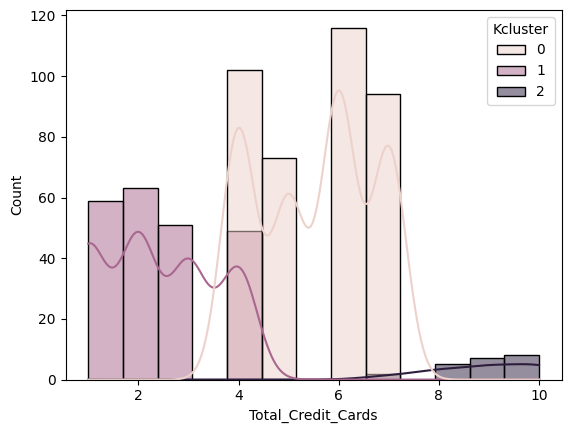

In [117]:
sns.histplot(df[df.Dcluster != -1], x="Total_Credit_Cards", kde=True, hue="Kcluster")

<Axes: xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

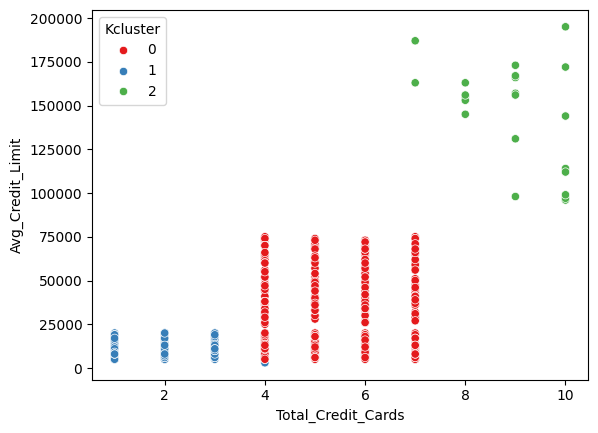

In [116]:
sns.scatterplot(df[df.Dcluster != -1], x="Total_Credit_Cards", y="Avg_Credit_Limit", hue="Kcluster", palette="Set1")

### Summary

1. Clusters in both KMeans and DBSCAN created based upon credit limit majorly.
2. KMeans clusters are better defined with clear distinction between average credit limit, no of cards, visits and calls
3. Cluster 0 has 4-7 credit cards with avg credit limit of about 33k
4. Cluster 1 has 1-3 credit cards with avg credit limit of about 12k
5. Cluster 2 has 7-10 credit cards with avg credit limit of about 140k
6. Cluster 2 spend more time online while Cluster 0 spend more time visiting and Cluster 1 spend more time talking on calls